In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fname = "Sentinel1.csv"

In [3]:
df_sent1 = pd.read_csv(fname)
df_sent1.head()

,system:index,20171003CR,20171003VH,20171003VH_asm,20171003VH_contras,20171003VH_corr,20171003VH_dent,20171003VH_diss,20171003VH_dvar,20171003VH_ent,...,20180224VV_imcorr2,20180224VV_inertia,20180224VV_prom,20180224VV_savg,20180224VV_sent,20180224VV_shade,20180224VV_svar,20180224VV_var,Did_you_us,.geo
0,00000000000000000006_0,0.535732,-17.718518,0.244792,0.625000,0.159201,0.519860,0.625000,0.187500,1.498562,...,0.661353,0.625000,1.449580,-24.291667,1.047365,0.020255,0.871528,0.374132,Y,NaN
1,00000000000000000006_1,0.591489,-16.473634,0.221354,0.750000,0.069915,0.779791,0.625000,0.312500,1.661230,...,0.869709,2.062500,20.912290,-25.354167,1.386859,-1.213252,3.123264,1.296441,Y,NaN
2,00000000000000000006_2,0.567928,-17.390391,0.156250,1.208333,0.159235,0.790692,0.875000,0.364583,1.935601,...,0.809761,1.395833,4.659975,-23.562500,1.123107,-0.059896,1.428819,0.706163,Y,NaN
3,00000000000000000006_3,0.529135,-18.165520,0.300347,0.770833,-0.050000,0.693147,0.562500,0.428819,1.361235,...,0.793481,1.875000,9.969329,-21.875000,1.300216,0.833333,2.173611,1.012153,Y,NaN
4,00000000000000000006_4,0.528997,-18.192079,0.752604,0.145833,0.168831,0.365864,0.145833,0.116319,0.466948,...,0.714586,1.687500,5.647823,-20.104167,1.220651,-1.175058,1.637153,0.831163,Y,NaN


In [43]:
dates = df_sent1.columns[1:-3]

cols_vv = [col for col in dates if ('VV' in col)and(len(col)==10)]
cols_vh = [col for col in dates if ('VH' in col)and(len(col)==10)]

/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seabor

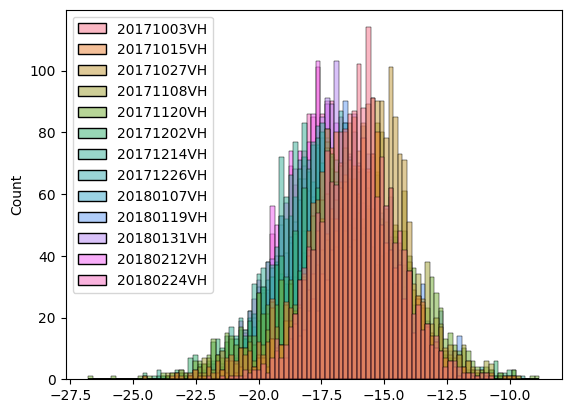

In [38]:
sns.histplot(df_sent1[cols_vh])
plt.show()

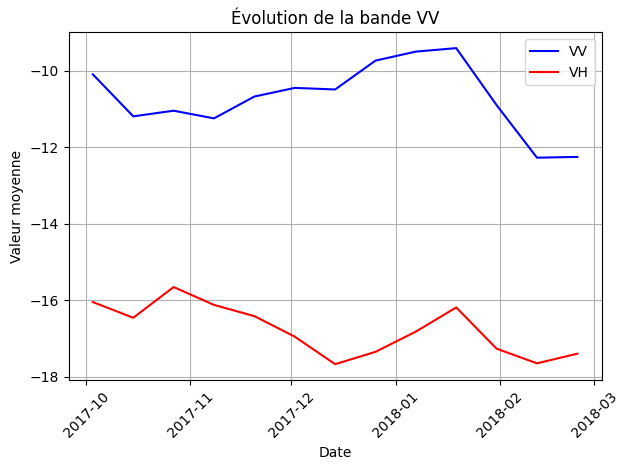

In [50]:
mean_vv = df_sent1[cols_vv].mean()
mean_vh = df_sent1[cols_vh].mean()

dates_vv = pd.to_datetime([col[:-2] for col in cols_vv], format='%Y%m%d')
dates_vh = pd.to_datetime([col[:-2] for col in cols_vh], format='%Y%m%d')

plt.plot(dates_vv, mean_vv.values, label='VV', color='b')
plt.plot(dates_vv, mean_vh.values, label='VH', color='r')
plt.title('Évolution de la bande VV')
plt.xlabel('Date')
plt.ylabel('Valeur moyenne')
plt.tick_params(axis='x', rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()